--2019-11-30 03:27:10--  https://raw.githubusercontent.com/huseinzol05/Self-Driving-Car-Engines/master/data/straight-lane.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50222 (49K) [image/jpeg]
Saving to: ‘straight-lane.jpg’

straight-lane.jpg   100%[===================>]  49.04K  --.-KB/s    in 0.02s   

2019-11-30 03:27:15 (1.99 MB/s) - ‘straight-lane.jpg’ saved [50222/50222]



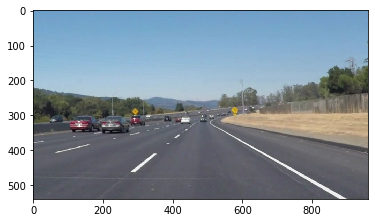

In [1]:
!wget https://raw.githubusercontent.com/huseinzol05/Self-Driving-Car-Engines/master/data/straight-lane.jpg
    
from skimage import io
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = io.imread('straight-lane.jpg')
plt.imshow(img)




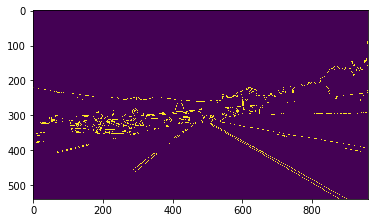

In [2]:
cannied = cv2.Canny(img, 100, 200)
plt.imshow(cannied)


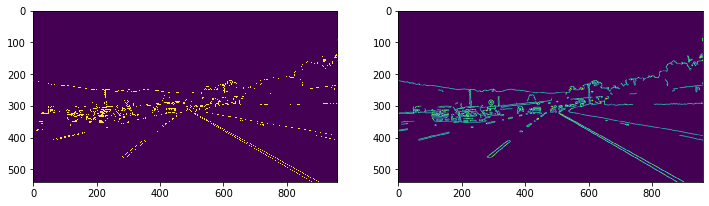

In [4]:
gaussian = cv2.GaussianBlur(cannied, (7, 7), 1)

plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cannied)
plt.subplot(1, 2, 2)
plt.imshow(gaussian)
plt.show()


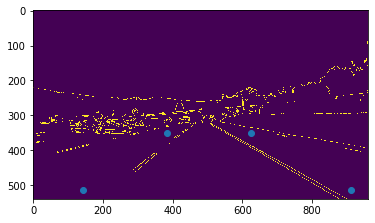

In [7]:
top_left = (0.4 * img.shape[1], 0.65 * img.shape[0])
top_right = (0.65 * img.shape[1], 0.65 * img.shape[0])
bottom_left = (0.15 * img.shape[1], 0.95 * img.shape[0])
bottom_right = (0.95 * img.shape[1], 0.95 * img.shape[0])
edges = np.array([top_left, top_right, bottom_left,
                  bottom_right])

plt.imshow(cannied)
plt.scatter(edges[:,0], edges[:, 1])


In [8]:
copied = gaussian.copy()

edges_int = np.array([top_left, top_right, bottom_left,
                  bottom_right]).astype('int32')

cv2.line(copied, tuple(edges_int[0]), 
         tuple(edges_int[2]), (255, 0, 0), 5)
cv2.line(copied, tuple(edges_int[0]), 
         tuple(edges_int[1]), (255, 0, 0), 5)
cv2.line(copied, tuple(edges_int[1]), 
         tuple(edges_int[3]), (255, 0, 0), 5)
cv2.line(copied, tuple(edges_int[2]), 
         tuple(edges_int[3]), (255, 0, 0), 5)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

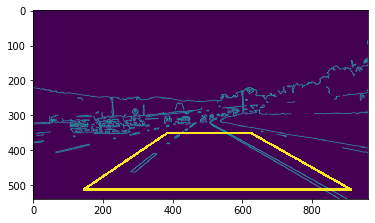

In [9]:
plt.imshow(copied)


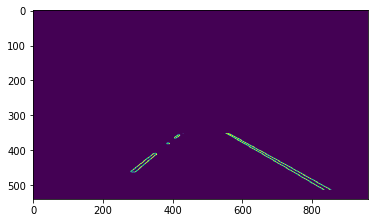

In [10]:
edges_int = np.array([top_left, bottom_left,
                      bottom_right, top_right]).astype('int32')

mask = np.zeros(gaussian.shape)
mask = cv2.fillPoly(mask, [edges_int], 255)

filtered_img = cv2.bitwise_and(gaussian, mask.astype('uint8'))
plt.imshow(filtered_img)

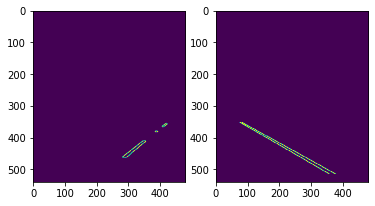

In [12]:
half_left = filtered_img[:, :filtered_img.shape[1] // 2]
half_right = filtered_img[:, filtered_img.shape[1] // 2: ]

plt.subplot(1, 2, 1)
plt.imshow(half_left)
plt.subplot(1, 2, 2)
plt.imshow(half_right)

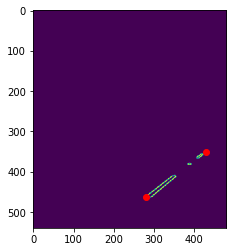

In [13]:
half_left_y, half_left_x = np.where(half_left > 50)

top_left_point = [np.min(half_left_y), np.max(half_left_x)]
bottom_left_point = [np.max(half_left_y), np.min(half_left_x)]
plt.imshow(half_left)
plt.scatter(top_left_point[1], top_left_point[0], c = 'r')
plt.scatter(bottom_left_point[1], bottom_left_point[0],
            c = 'r')


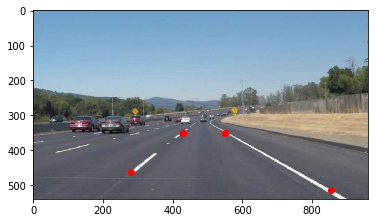

In [14]:
half_right_y, half_right_x = np.where(half_right > 50)

top_right_point = [np.min(half_right_y), 
                  half_left.shape[1] + np.min(half_right_x)]
bottom_right_point = [np.max(half_right_y), 
                  half_left.shape[1] + np.max(half_right_x)]

plt.imshow(img)
plt.scatter(top_left_point[1], top_left_point[0], c = 'r')
plt.scatter(bottom_left_point[1], bottom_left_point[0],
            c = 'r')
plt.scatter(top_right_point[1], top_right_point[0], c = 'r')
plt.scatter(bottom_right_point[1], bottom_right_point[0],
            c = 'r')

In [16]:
lefts = np.array([top_left_point, bottom_left_point])
rights = np.array([top_right_point, bottom_right_point])
lefts, rights


(array([[351, 430],
        [463, 279]]), array([[351, 551],
        [513, 855]]))

In [20]:
m_left, c_left = np.polyfit(lefts[:,1], lefts[:,0], 1)
m_right, c_right = np.polyfit(rights[:,1], rights[:,0], 1)

c_left, c_right, m_left, m_right




(669.9403973509934, 57.37499999999996, -0.7417218543046357, 0.5328947368421053)

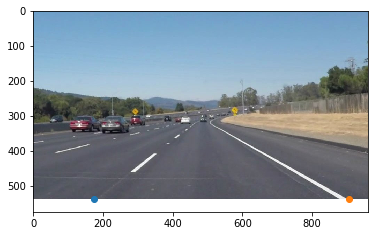

In [21]:
bottom_left_actual = int((img.shape[0] - c_left) / m_left)
bottom_right_actual = int((img.shape[0] - c_right) / m_right)
bottom_left_actual, bottom_right_actual

plt.imshow(img)
plt.scatter(bottom_left_actual, img.shape[0])
plt.scatter(bottom_right_actual, img.shape[0])

In [23]:
center_points = (bottom_right_actual - bottom_left_actual) / 2 + bottom_left_actual

center_points

540.0

In [25]:
img.shape[1]

960

In [24]:
(img.shape[1] / 2) - center_points


-60.0